# Matching PSF sims to in-flight JWST data

In [28]:
import webbpsf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.io.fits as fits

Often one wants to generate PSFs matched to some particular science dataset or file. The convenience function `webbpsf.setup_sim_to_match_data` helps with this, using the file's FITS header to set up a simulated instrument matched to the appropriate instrument setup and date of observation.  

In [20]:
filename = 'jw02739010001_02103_00001_nrcalong_cal.fits'

In [21]:
inst = webbpsf.setup_sim_to_match_file(filename)

Setting up sim to match jw02739010001_02103_00001_nrcalong_cal.fits
iterating query, tdelta=3.0

MAST OPD query around UTC: 2023-04-05T03:33:47.591
                        MJD: 60039.14846748843

OPD immediately preceding the given datetime:
	URI:	 mast:JWST/product/R2023040302-NRCA3_FP1-1.fits
	Date (MJD):	 60037.0387
	Delta time:	 -2.1098 days

OPD immediately following the given datetime:
	URI:	 mast:JWST/product/R2023040504-NRCA3_FP1-1.fits
	Date (MJD):	 60039.4669
	Delta time:	 0.3184 days
User requested choosing OPD time closest in time to 2023-04-05T03:33:47.591, which is R2023040504-NRCA3_FP1-1.fits, delta time 0.318 days
Importing and format-converting OPD from /Users/mperrin/software/webbpsf-data/MAST_JWST_WSS_OPDs/R2023040504-NRCA3_FP1-1.fits
Backing out SI WFE and OTE field dependence at the WF sensing field point

Configured simulation instrument for:
    Instrument: NIRCam
    Filter: F335M
    Detector: NRCA5
    Apername: NRCA5_FULL
    Det. Pos.: (1024, 1024) 
    Imag

By default it is configured for the center of the detector, which will give a reasonable average match to PSFs across the detector. If you have a particular detector region of interest, and want to include the subtle small dependence on position, simply adjust the `detector_position` attribute. 
To adjust subpixel positions, you can set `options['source_offset_{x/y}']`.

In [22]:
psf_center = (1996, 1413)  # note this is in X, Y order
boxsize = 50

In [58]:
inst.detector_position = psf_center
inst.options['source_offset_x'] = 0.015

In [59]:
sim_psf = inst.calc_psf(fov_pixels=box_size)

In [60]:
obs_im = fits.getdata(filename)
obs_psf = obs_im[psf_center[1]-boxsize//2:psf_center[1]+boxsize//2, psf_center[0]-boxsize//2:psf_center[0]+boxsize//2,]
obs_psf -= np.nanmedian(obs_psf) # simple background subtraction

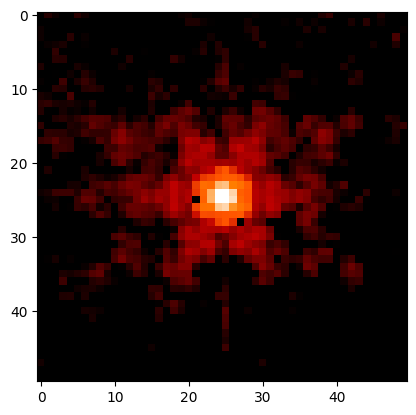

In [61]:
vmax = np.nanmax(obs_psf)
cmap=matplotlib.cm.gist_heat
cmap.set_bad(cmap(0))
plt.imshow(obs_psf , 
           norm = matplotlib.colors.LogNorm(vmax/1e4, vmax), cmap=cmap)

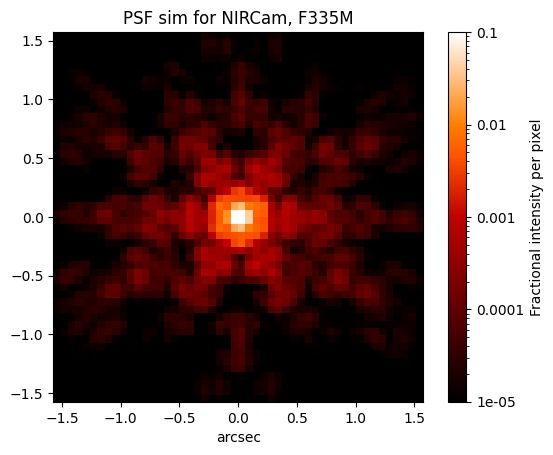

In [62]:
webbpsf.display_psf(sim_psf, ext='DET_DIST', vmax=0.1, vmin=1e-5)

You may also find it useful to adjust the `.options['charge_diffusion_sigma']` paraneter as well. See the docs page about JWST detector effect models for more. 